 Fs=1000 hz
 Ts=0.001 s


(-100.0, 100.0)

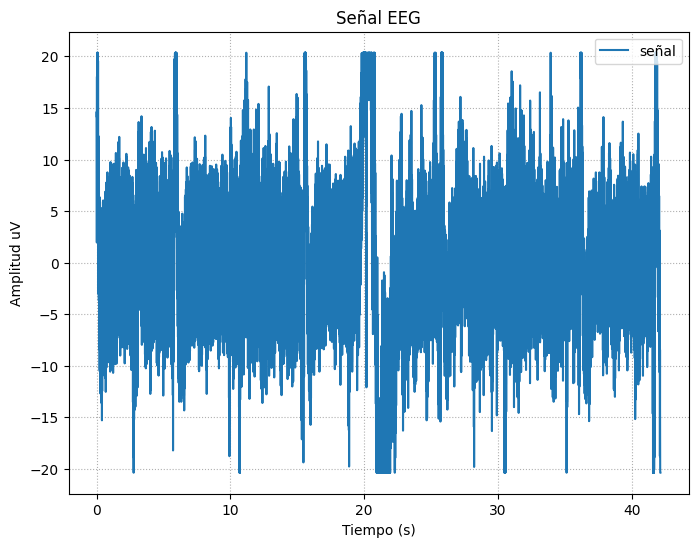

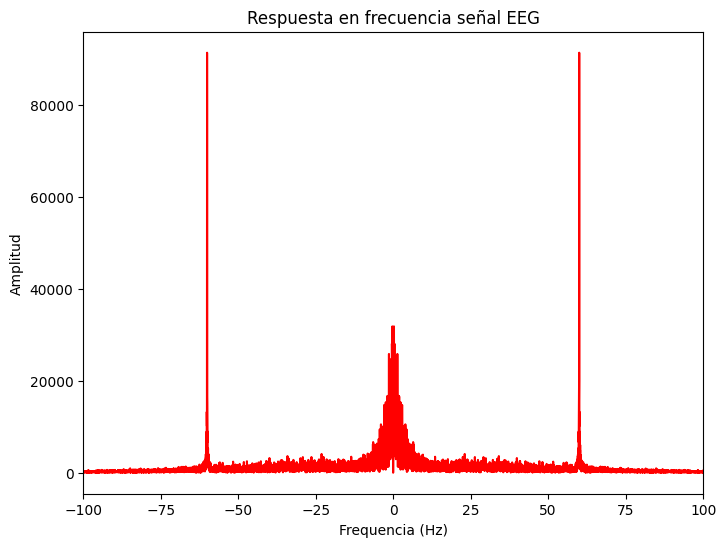

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
from scipy import signal
import math

from scipy.fftpack import fft, fftshift


f = open("ojosV.txt","r")
raw_data = f.read()  # con f.read() leemos todo el contenido
f.close()

raw_data
Fs = 1000
Ts = 1/Fs
print(f" Fs={Fs} hz\n Ts={Ts} s")

a = np.genfromtxt("./ojosV.txt", delimiter="\t",skip_header = 3)
eeg = a[:, 5]
N=len(eeg)
eeg = eeg - np.mean(eeg)
eeg = np.array(eeg) * 40000/1000000
t = np.arange(1, len(eeg)+1)/Fs
plt.figure(figsize=(8, 6))
plt.plot(t, eeg, label="señal")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud uV")
plt.legend(loc="upper right")
plt.title("Señal EEG")
plt.grid(linestyle=":")


#FFT
def fft_fun(x, fs):
    X = fftshift(fft(x))
    N = len(X)
    w = 2 * np.pi * np.arange(N) / N
    w = np.unwrap(fftshift(w)) - 2 * np.pi
    wHz = w * fs / (2 * np.pi)
    return wHz, X


wHz, Y = fft_fun(eeg, Fs)

#Grafica FFT EEG
plt.figure(figsize=(8, 6))
plt.plot(wHz, np.abs(Y), "r")
plt.xlabel("Frequencia (Hz)")
plt.ylabel("Amplitud")
plt.title("Respuesta en frecuencia señal EEG")
plt.xlim(-100, 100)











Orden del filtro: 16
Frecuencia de corte calculada: 35.01 hz


Text(0.5, 1.0, 'Respuesta en frecuencia del filtro en DB')

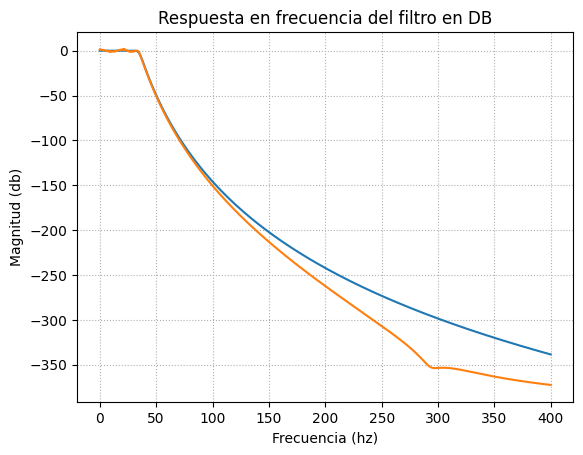

In [137]:
wp=2*np.pi*35
ws=2*np.pi*55

N_ord, Wc= signal.buttord(wp, ws, gpass=3, gstop=60, analog=True) #gpass=loss in passband edge frecuencies, gstop= attenuation in stopband edge frecuencies
fc = np.round(Wc/(2*np.pi) ,2)

print(f"Orden del filtro: {N_ord}")
print(f"Frecuencia de corte calculada: {fc} hz")

# Funcion de transferencia del filtro pasa bajo analogico
b,a = signal.butter(N_ord, Wc, 'lowpass', True, 'ba')

# Respuesta en frecuencia del filtro analogico
Fmax=400
F_freqs = np.linspace(0,Fmax,1000)
W_freqs = 2*np.pi*F_freqs  #Angular frecuences

W_freqs, H = signal.freqs(b,a,W_freqs)
Hm=np.abs(H)
plt.plot(F_freqs, 20 * np.log10(Hm))
plt.grid(linestyle=":")
plt.xlabel("Frecuencia (hz)")
plt.ylabel("Magnitud (db)")


bd, ad = signal.bilinear(b,a,Fs)

Wz, Hd = signal.freqz(bd, ad, W_freqs/Fs)

Hdm = np.abs(Hd)
plt.plot(F_freqs, 20 * np.log10(Hdm))
plt.grid(linestyle=":")
plt.xlabel("Frecuencia (hz)")
plt.ylabel("Magnitud (db)")
plt.title('Respuesta en frecuencia del filtro en DB')


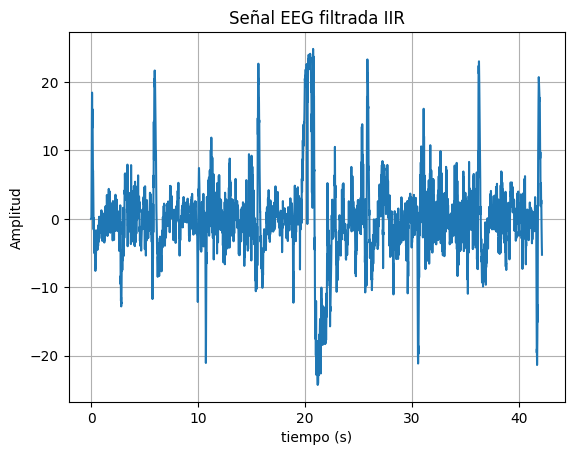

In [138]:

y = signal.lfilter(bd,ad, eeg)
t=  np.arange(1, len(y)+1)/Fs


plt.plot(t,y, label="Señal filtrada EEG")
plt.grid()
plt.xlabel("tiempo (s)")
plt.ylabel("Amplitud")
plt.title('Señal EEG filtrada IIR')
plt.show()

Text(0.5, 1.0, 'Respuesta en frecuencia señal EEG filtrada')

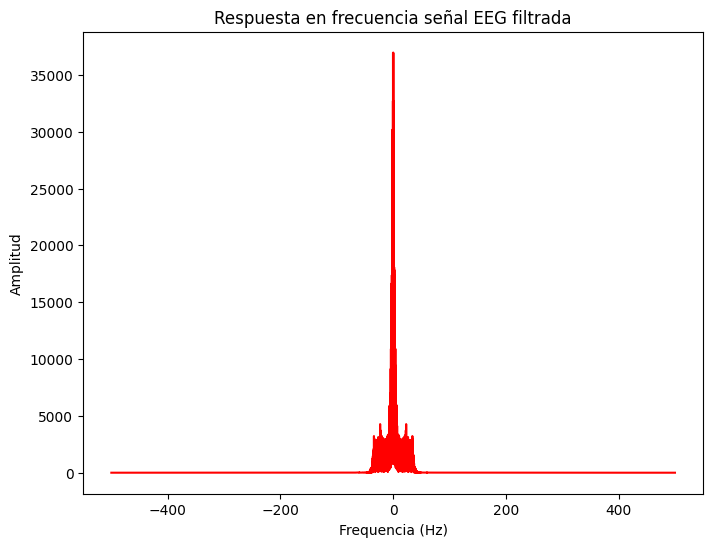

In [139]:

wHz, Y = fft_fun(y, Fs)

#Grafica FFT EEG
plt.figure(figsize=(8, 6))
plt.plot(wHz, np.abs(Y), "r")
plt.xlabel("Frequencia (Hz)")
plt.ylabel("Amplitud")
plt.title("Respuesta en frecuencia señal EEG filtrada")

